Step-by-Step Guide:
1. Load the dataset.
2. Explore the data.
3. Prepare the data like handle missing value, etc.
4. Split the dataset into train and test sets.
5. Train the Linear Regression models.
6. Do an evaluation.
7. Visualize it !

### <b>1. Load the Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# We use boston dataset
df = pd.read_csv('boston.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### <b>2. Explore the Data

In [4]:
df.shape

(506, 14)

In [5]:
# looking for statistics of the dataset
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# check for missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

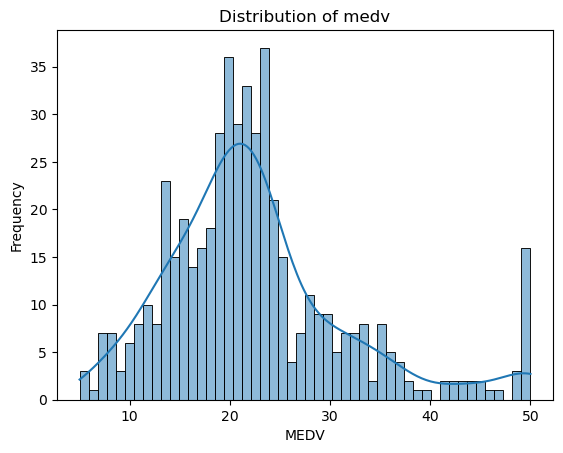

In [7]:
# Visualize the distribution of the target variable
sns.histplot(df['medv'], bins=50, kde=True)
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Distribution of medv')
plt.show()

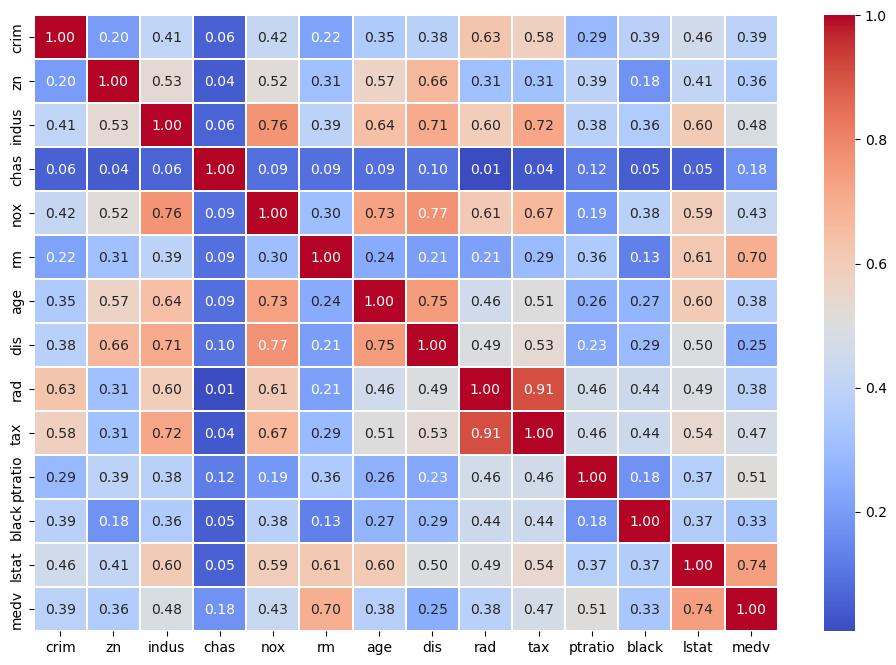

In [8]:
# Visualize the correlation between the features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr().abs(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1, linecolor='white', cbar=True)
plt.show()

### <b>3. Data Preparation

<p> since there's no missing values in our Boston dataset, so we don't have to do any of data engineering to handle it. Let's do the Splitting data step !

### <b>4. Split the Dataset

In [9]:
# Dene the features and target variable
X = df.drop('medv', axis=1)
y = df['medv']

In [10]:
X.head() # the features

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [11]:
y.head() # the target

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [12]:
# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### <b>5. Train the Linear Regression Models

In [18]:
# Define the model
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1))  # Output layer

# Define optimizer with custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 14)                196       
                                                                 
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

# Train the NN Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10000, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/10000
9/9 [==============================] - 1s 29ms/step - loss: 637.6865 - mae: 23.4828 - val_loss: 596.7564 - val_mae: 23.0691
Epoch 2/10000
9/9 [==============================] - 0s 8ms/step - loss: 629.3769 - mae: 23.3222 - val_loss: 589.3187 - val_mae: 22.9192
Epoch 3/10000
9/9 [==============================] - 0s 8ms/step - loss: 621.3434 - mae: 23.1645 - val_loss: 582.1417 - val_mae: 22.7739
Epoch 4/10000
9/9 [==============================] - 0s 9ms/step - loss: 613.2551 - mae: 23.0065 - val_loss: 575.0382 - val_mae: 22.6285
Epoch 5/10000
9/9 [==============================] - 0s 8ms/step - loss: 605.5130 - mae: 22.8521 - val_loss: 567.9023 - val_mae: 22.4816
Epoch 6/10000
9/9 [==============================] - 0s 13ms/step - loss: 597.6461 - mae: 22.6981 - val_loss: 560.8044 - val_mae: 22.3345
Epoch 7/10000
9/9 [==============================] - 0s 9ms/step - loss: 589.8873 - mae: 22.5452 - val_loss: 553.6492 - val_mae: 22.1850
Epoch 8/10000
9/9 [====================

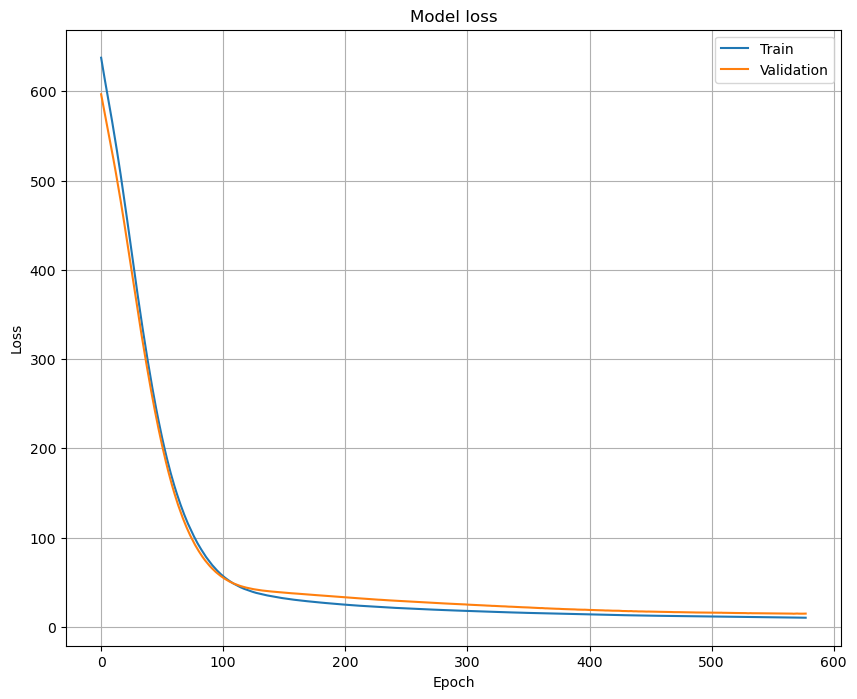

In [20]:
# Plot training & validation loss values
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()

### <b>6. Evaluate Your Models !

In [22]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2.4363420009613037


### <b>7. Then Visualize the Result

In [23]:
# Make predictions
y_test_pred = model.predict(X_test).flatten()

5/5 [==============================] - 0s 1ms/step


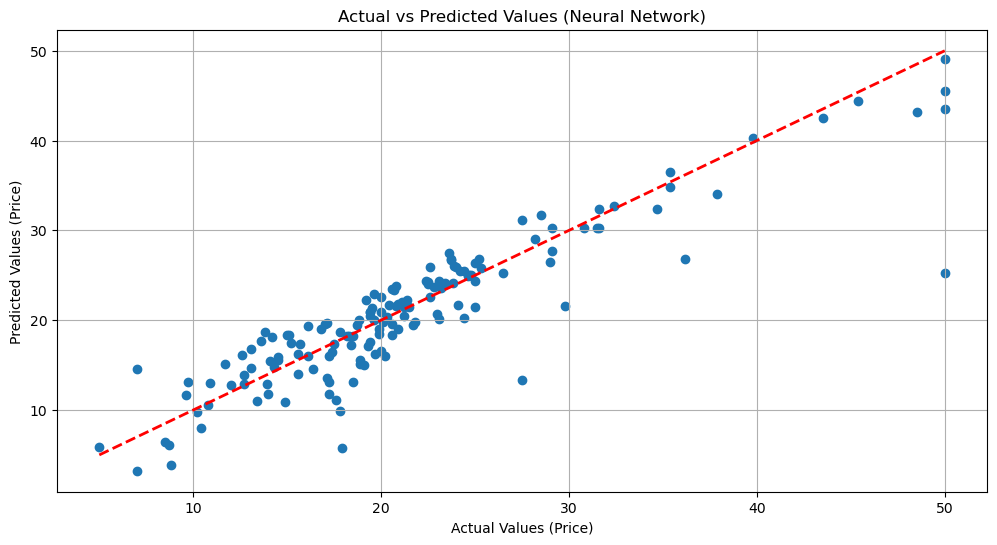

In [24]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values (Price)')
plt.ylabel('Predicted Values (Price)')
plt.title('Actual vs Predicted Values (Neural Network)')
plt.grid()
plt.show()

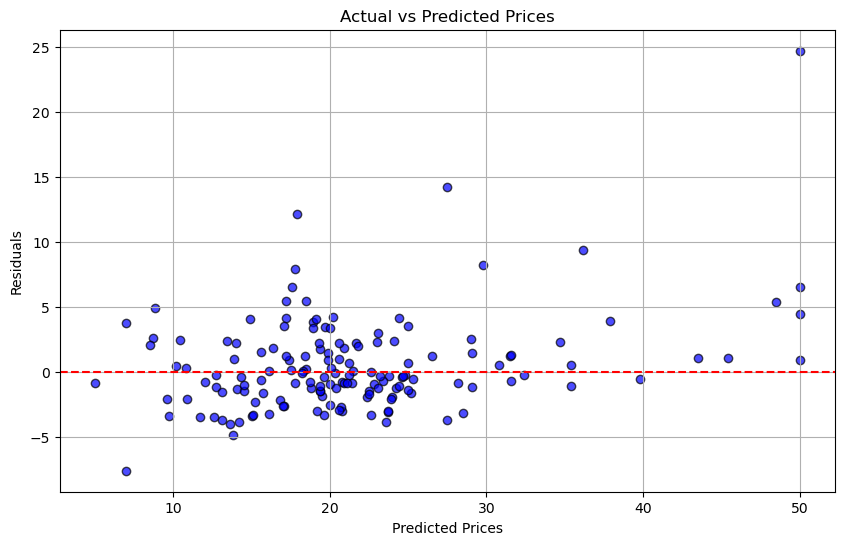

In [25]:
# Calculate Residuals
residuals = y_test - y_test_pred

# Plot actial vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', edgecolors='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Actual vs Predicted Prices')
plt.grid()
plt.show()